In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("data/italy_wikipedia.xlsx", sheet_name='Wide', parse_dates=True, dayfirst=True)

# We fill NAs by the average of the value directly before and directly after
for col in df.columns[df.isna().any(axis=0)]:
    df[col] = df[col].fillna((df[col].shift() + df[col].shift(-1))/2)

# We will not allow for negative values. These are defined as corrections due to cases that were
# subsequently declared negative. So, we will go backwards to subtract these corrections from the
# most recent value above
neg_cols = (df.iloc[:, 1:] < 0).any(axis=0)
neg_cols = neg_cols.index[neg_cols]

for col in neg_cols:
    # Find rows in which the value is negative
    indices = df.index[df[col] < 0]
    
    # Look at indices in reverse
    for index in indices[::-1]:
        df.loc[index-1, col] = df.loc[index-1, col] + df.loc[index, col]
        df.loc[index, col] = 0
        
df['Growth_Rate'] = df['Confirmed_New'].divide(df['Active_Total'])
df

,Date,VDA_Confirmed,VDA_Deaths,LIG_Confirmed,LIG_Deaths,PIE_Confirmed,PIE_Deaths,LOM_Confirmed,LOM_Deaths,VEN_Confirmed,...,SAR_Deaths,Confirmed_New,Confirmed_Total,Deaths_New,Deaths_Total,Active_ICU,Active_Total,Recovered,Tested,Growth_Rate
0,2020-01-31,0,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,2,0,0,1.000000
1,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,1,3,0,0,0,3,0,0,0.333333
2,2020-02-21,0,0,0,0,0,0,15,0,2,...,0,17,20,1,1,0,19,0,0,0.894737
3,2020-02-22,0,0,0,0,1,0,40,1,16,...,0,59,79,1,2,18,75,0,0,0.786667
4,2020-02-23,0,0,0,0,2,0,57,1,7,...,0,71,150,1,3,25,147,0,0,0.482993
5,2020-02-24,0,0,0,0,0,0,61,4,7,...,0,77,227,4,7,27,199,1,0,0.386935
6,2020-02-25,0,0,1,0,0,0,67,2,11,...,0,93,320,3,10,35,309,1,8600,0.300971
7,2020-02-26,0,0,10,0,0,0,65,1,28,...,0,125,445,2,12,36,430,3,9587,0.290698
8,2020-02-27,0,0,8,0,1,0,98,5,40,...,0,205,650,5,17,56,588,45,12014,0.348639
9,2020-02-28,0,0,0,0,9,0,128,3,40,...,0,238,888,4,21,64,821,46,15695,0.289890


C:\Users\mikew\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


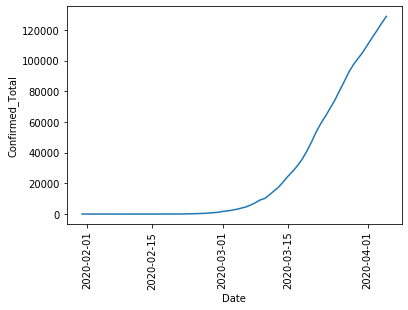

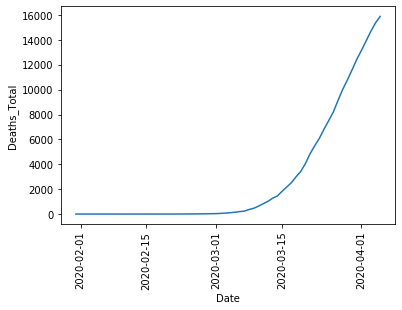

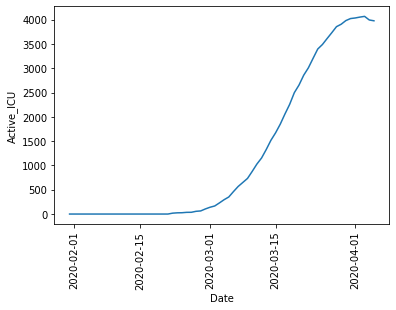

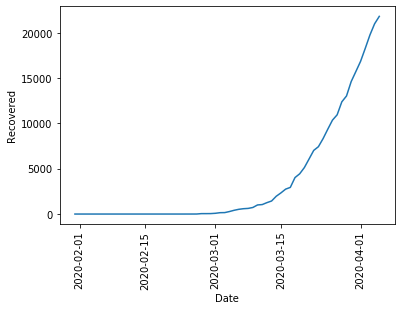

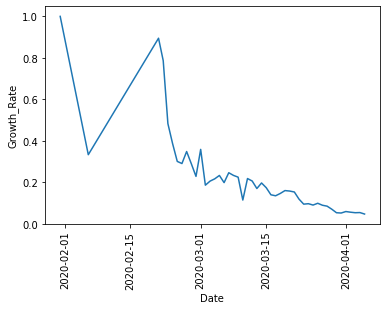

In [2]:
sns.lineplot('Date', 'Confirmed_Total', data=df)
plt.xticks(rotation=90)
plt.show()

sns.lineplot('Date', 'Deaths_Total', data=df)
plt.xticks(rotation=90)
plt.show()

sns.lineplot('Date', 'Active_ICU', data=df)
plt.xticks(rotation=90)
plt.show()

sns.lineplot('Date', 'Recovered', data=df)
plt.xticks(rotation=90)
plt.show()

sns.lineplot('Date', 'Growth_Rate', data=df)
plt.xticks(rotation=90)
plt.show()

In [3]:
df_confirmed = pd.melt(df, id_vars='Date', value_vars=[col for col in df.columns if "_Confirmed" in col])

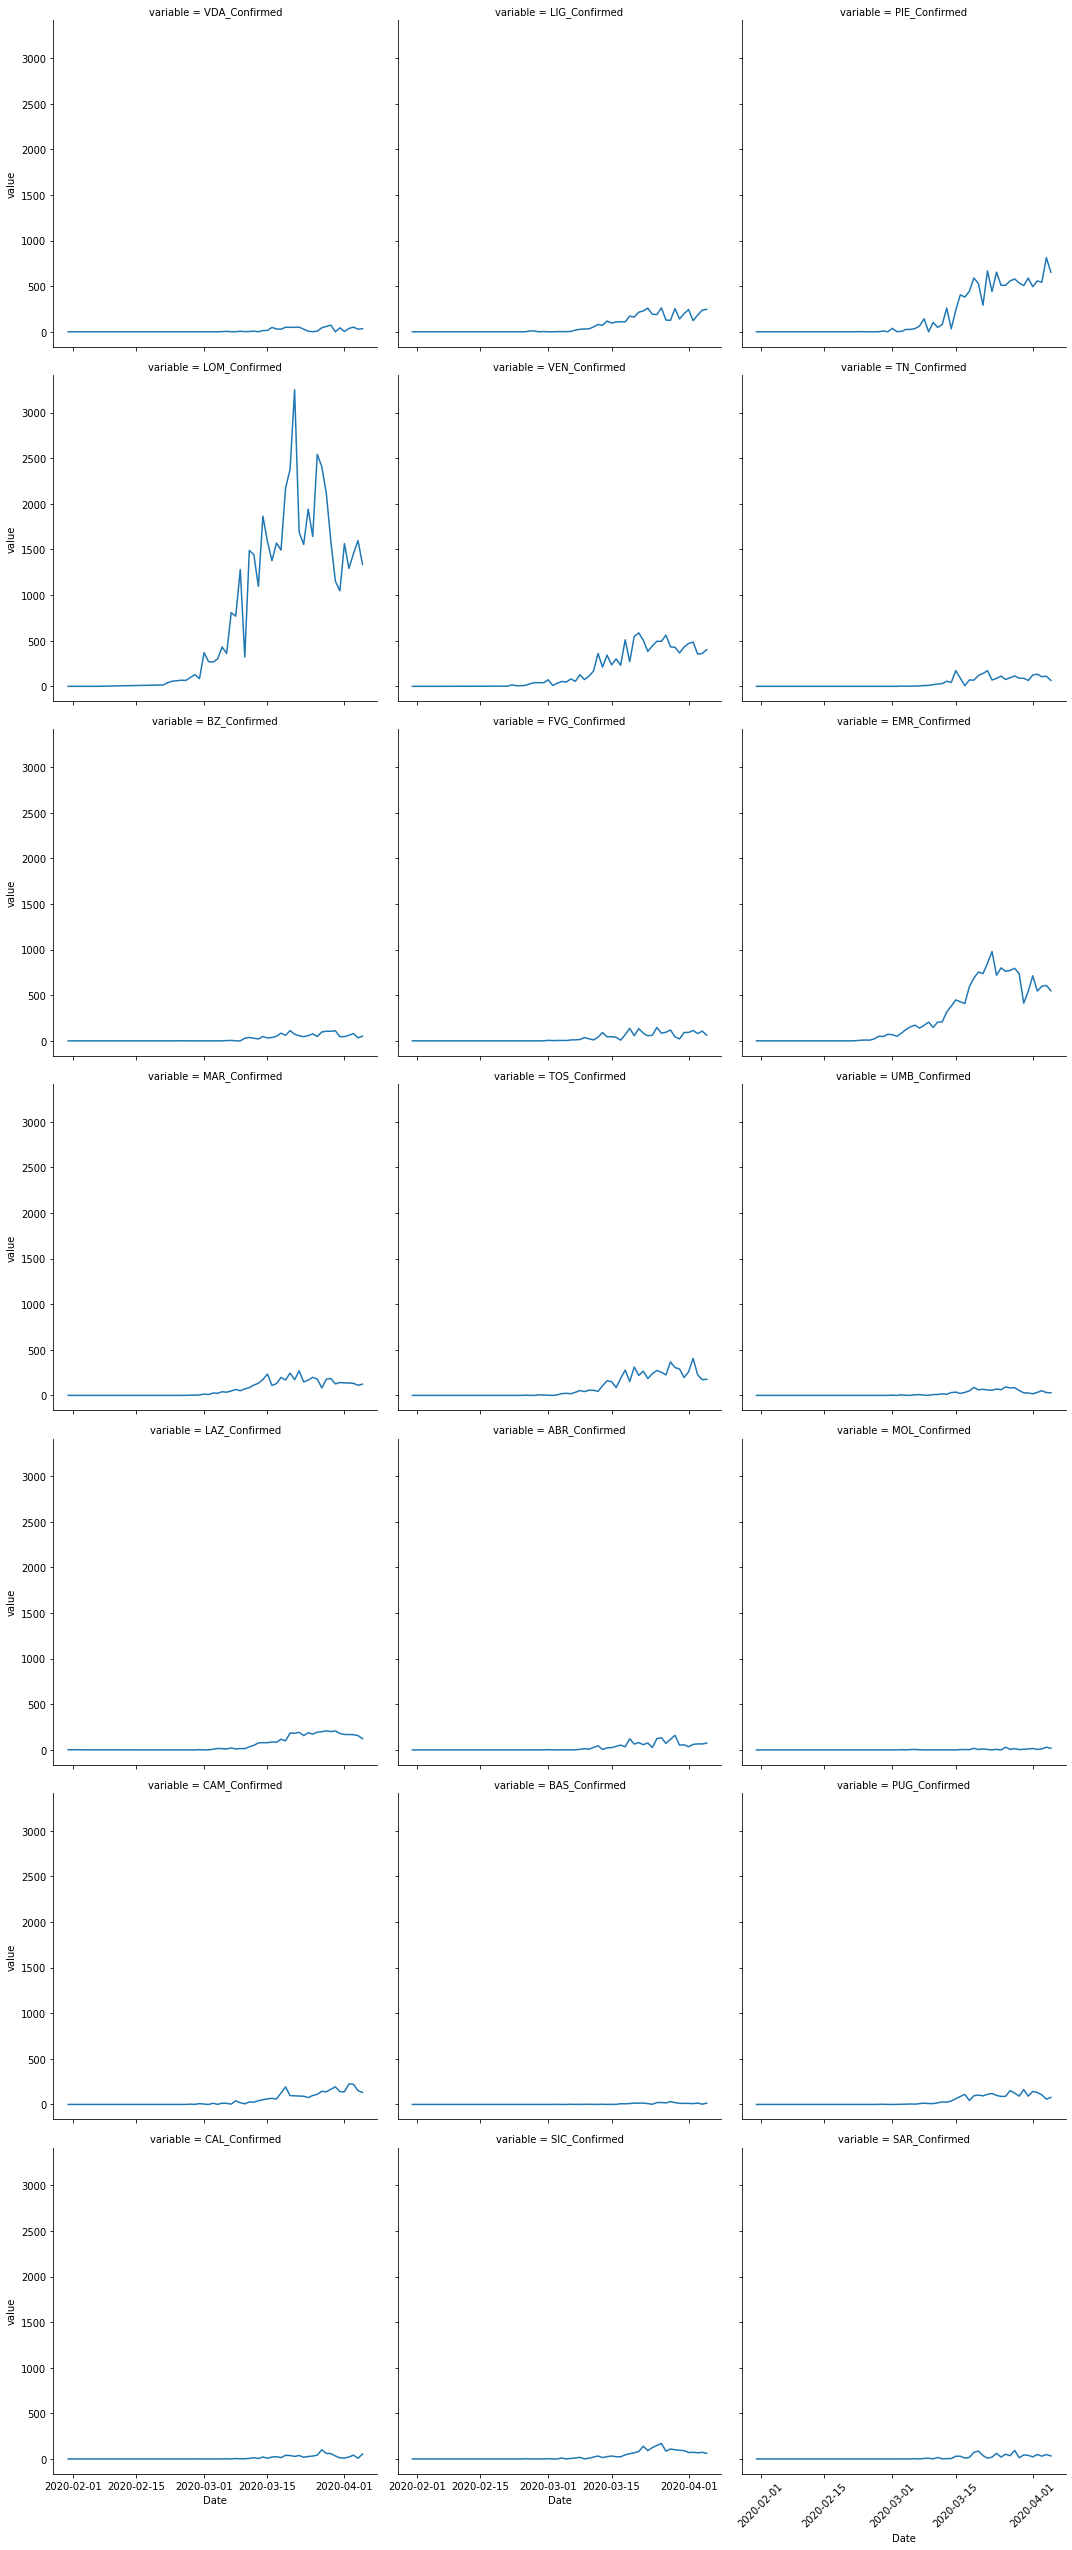

In [4]:
sns.relplot('Date', 'value', data=df_confirmed, col='variable', col_wrap=3, kind="line")
plt.xticks(rotation=45)
plt.show()

# Get distances between cities

In [5]:
from geopy import distance

df_cities = pd.read_excel("data/italy_wikipedia.xlsx", sheet_name='Cities', index_col="City")

In [6]:
dict_cities = {}

for city in df_cities.index:
    dict_cities[city] = []
    
    for second_city in df_cities.index:
        city_1 = (df_cities.loc[city, "Latitude"], df_cities.loc[city, "Longitude"])
        city_2 = (df_cities.loc[second_city, "Latitude"], df_cities.loc[second_city, "Longitude"])
        dict_cities[city].append(distance.distance(city_1, city_2).km)
        
df_distances = pd.DataFrame(dict_cities)
df_distances.index = df_cities.index

In [7]:
df_distances.to_excel("data/distances.xlsx")